In [1]:
import getpass
user_name = getpass.getuser()

In [2]:
import getpass
import pandas as pd
import sys
sys.path.append('/Users/{}/GitHub/mouse_bandit/jupyter_notebooks/helper_functions'.format(user_name))
import lr_simulation
import numpy as np

In [3]:
data = pd.read_csv('/Users/{:}/Dropbox (HMS)/mouse_bandit/markov_full.csv'.format(user_name), index_col=0)

In [4]:
#include past 10 choice and reward values (this is most convenient given the current data structure)
choice_history = []
reward_history = []
for col in data.columns:
    if '_Port' in col:
        choice_history.append(data[col][:])
    elif '_Reward' in col:
        reward_history.append(data[col][:])
        
choice_history = np.transpose(np.asarray(choice_history))
reward_history = np.transpose(np.asarray(reward_history))
switch_history = np.abs(np.diff(choice_history)) # right now just missing whether or not switched on n-10 trial

#current trial decision and outcome 
choice = []
reward = []
switch = []

for col in data.columns:
    if 'Decision' in col:
        #print(col)
        choice.append(data[col][:])
    elif 'Reward' in col:
        #print(col)
        reward.append(data[col][:])
    elif 'Switch' in col:
        switch.append(data[col][:])

choice = np.transpose(np.asarray(choice))
reward = np.transpose(np.asarray(reward))
switch = np.transpose(np.asarray(switch))

In [13]:
# set up as X and Y for logistic regression (X contains all predictors)
X_choice = np.column_stack((choice_history, reward_history)) # n-1 to n-10 trial choices and outcomes
X_switch = np.column_stack((switch_history, reward_history[:,0:9])) # n-1 to n-10 trial switches and outcomes

Y_choice = choice.ravel() # current trial choices
Y_switch = switch.ravel() # current trial switches

In [14]:
metrics, lr_predict, lr_proba, lr_score=lr_simulation.lr_bandit(X_switch, Y_switch, n_simulations=10)
metrics2, lr_predict2, lr_proba2, lr_score2=lr_simulation.lr_bandit(X_choice, Y_choice, n_simulations=10)

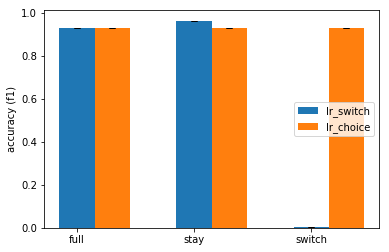

In [16]:
import matplotlib.pyplot as plt
n_simulations=10
height_a = [np.mean(lr_score), np.mean(metrics[2,0,:]), np.mean(metrics[2,1,:])]
ystd1 = [np.std(lr_score), np.std(metrics[2,0,:]), np.std(metrics[2,1,:])]
yerr1 = [ystd1[i] / np.sqrt(n_simulations) for i in range(len(ystd1))]

height_b = [np.mean(lr_score2), np.mean(metrics2[2,0,:]), np.mean(metrics2[2,1,:])]
ystd2 = [np.std(lr_score2), np.std(metrics2[2,0,:]), np.std(metrics2[2,1,:])]
yerr2 = [ystd2[i] / np.sqrt(n_simulations) for i in range(len(ystd2))]



barWidth = 0.3
# The x position of bars
r1 = np.arange(len(height_a))
r2 = np.arange(len(height_a))+barWidth

conditions = ['full', 'stay', 'switch']
plt.bar(r1, height_a, width=barWidth, label='lr_switch', yerr=yerr1, capsize=3)
plt.bar(r2, height_b, width=barWidth, label='lr_choice', yerr=yerr2, capsize=3)


plt.xticks(range(len(height_a)), conditions)
plt.ylabel('accuracy (f1)')
plt.legend()
plt.show()